In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os


cwd = os.getcwd()
cwds = cwd.split('/')
cwds.pop(-1)
img_path = '/'.join(cwds[:-1]) + f'/image/nature-1.jpeg'
mask_img_path = '/'.join(cwds[:-1]) + f'/image/circle_02.jpg'
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
mask_img = cv.imread(mask_img_path,cv.IMREAD_GRAYSCALE)
mask_img = mask_img/255



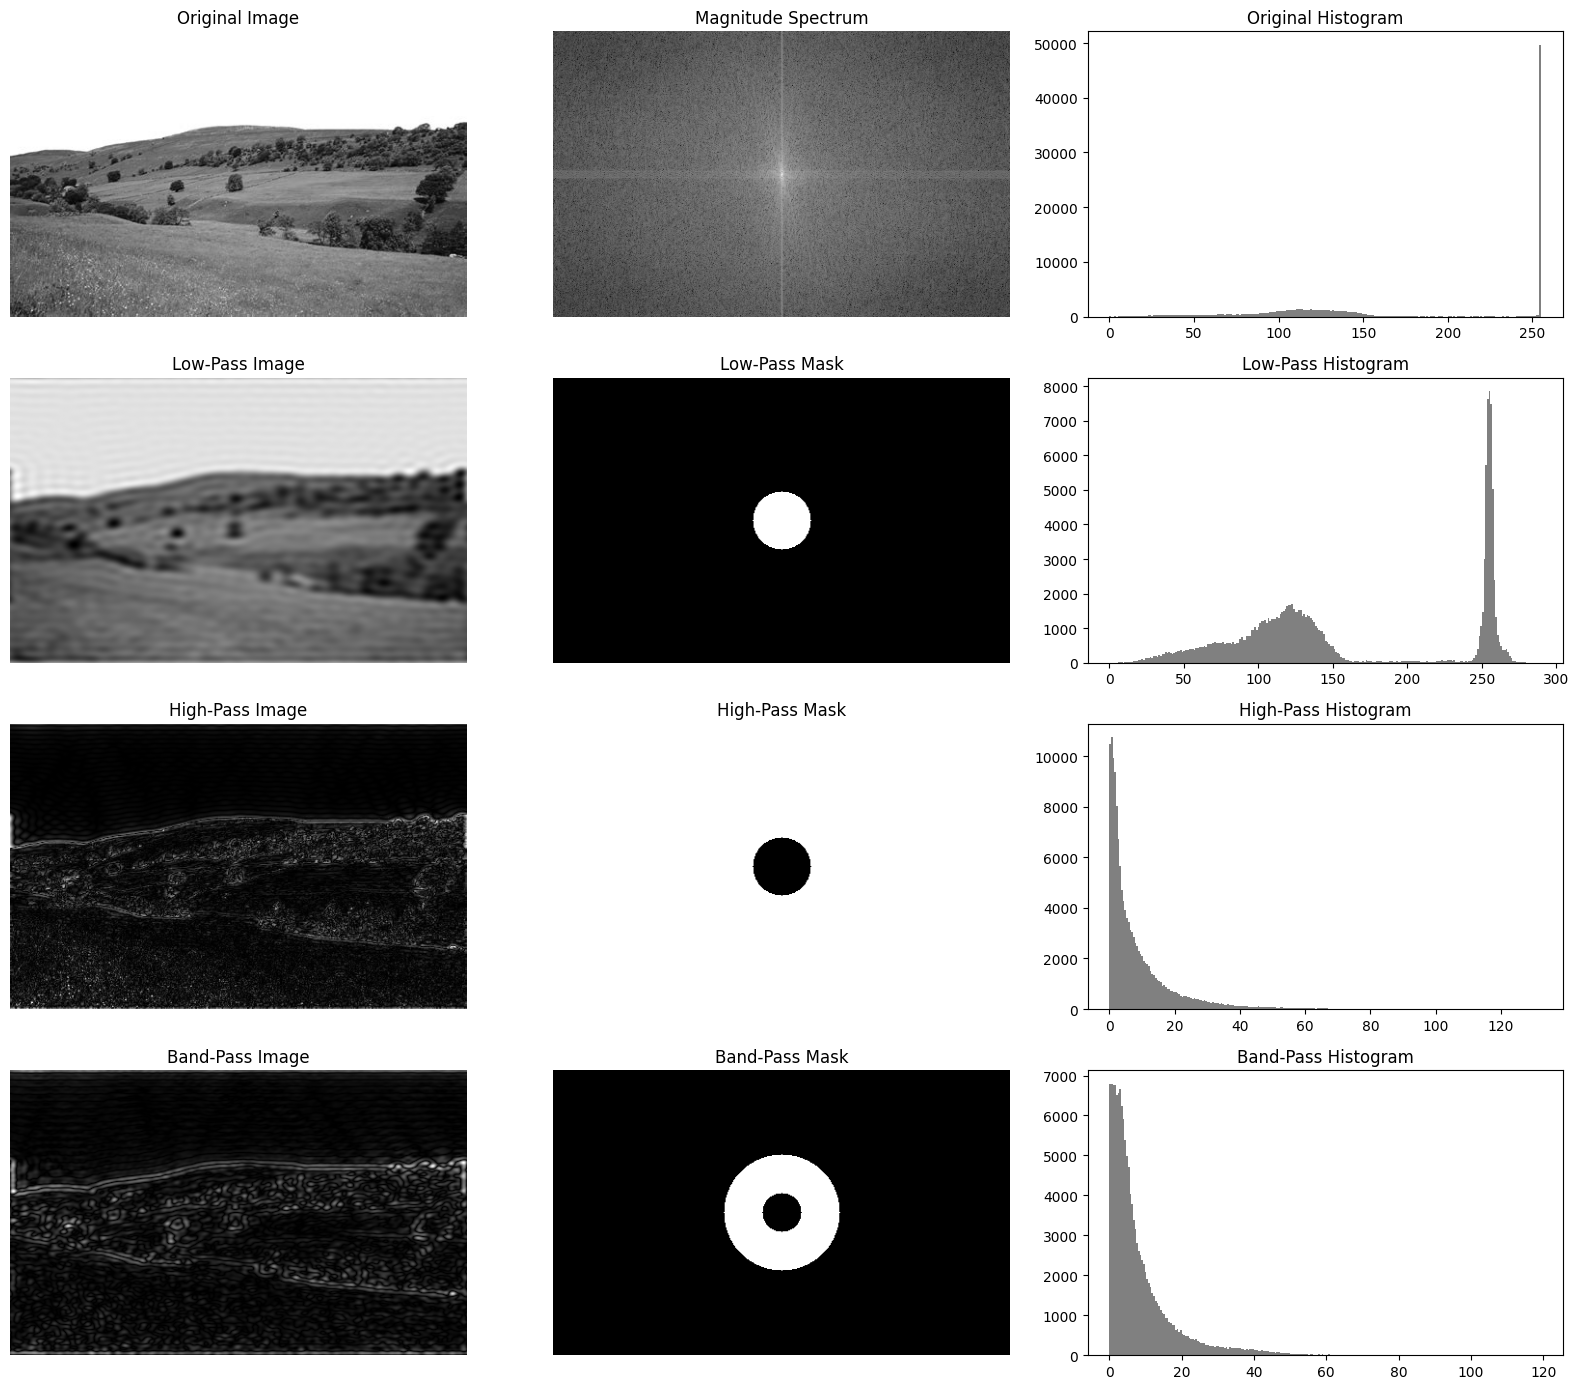

In [3]:

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(np.abs(fshift) + 1)

rows, cols = img.shape
crow, ccol = rows // 2, cols // 2   # center

# -----------------------------
# 3️⃣ Create filter masks
# -----------------------------
# Low-pass mask (keep low frequencies)
r_low = 30   # radius of low frequency circle
mask_low = np.zeros_like(img)
cv.circle(mask_low, (ccol, crow), r_low, 1, -1)

# High-pass mask (keep high frequencies)
mask_high = 1 - mask_low

# Band-pass mask (keep mid frequencies)
r_low2, r_high2 = 20, 60
mask_band = np.zeros_like(img)
cv.circle(mask_band, (ccol, crow), r_high2, 1, -1)
cv.circle(mask_band, (ccol, crow), r_low2, 0, -1)

# -----------------------------
# 4️⃣ Apply masks
# -----------------------------
low_pass = fshift * mask_low
high_pass = fshift * mask_high
band_pass = fshift * mask_band

# -----------------------------
# 5️⃣ Inverse FFT to reconstruct
# -----------------------------
def reconstruct(filtered):
    f_ishift = np.fft.ifftshift(filtered)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    return img_back

img_low = reconstruct(low_pass)
img_high = reconstruct(high_pass)
img_band = reconstruct(band_pass)

# -----------------------------
# 6️⃣ Plot results
# -----------------------------
plt.figure(figsize=(16,14))

# Original and spectrum
plt.subplot(4,3,1), plt.imshow(img, cmap='gray')
plt.title("Original Image"), plt.axis('off')
plt.subplot(4,3,2), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title("Magnitude Spectrum"), plt.axis('off')
plt.subplot(4,3,3), plt.hist(img.ravel(), bins=256, color='gray')
plt.title("Original Histogram")

# Low-pass
plt.subplot(4,3,4), plt.imshow(img_low, cmap='gray')
plt.title("Low-Pass Image"), plt.axis('off')
plt.subplot(4,3,5), plt.imshow(mask_low, cmap='gray')
plt.title("Low-Pass Mask"), plt.axis('off')
plt.subplot(4,3,6), plt.hist(img_low.ravel(), bins=256, color='gray')
plt.title("Low-Pass Histogram")

# High-pass
plt.subplot(4,3,7), plt.imshow(img_high, cmap='gray')
plt.title("High-Pass Image"), plt.axis('off')
plt.subplot(4,3,8), plt.imshow(mask_high, cmap='gray')
plt.title("High-Pass Mask"), plt.axis('off')
plt.subplot(4,3,9), plt.hist(img_high.ravel(), bins=256, color='gray')
plt.title("High-Pass Histogram")

# Band-pass
plt.subplot(4,3,10), plt.imshow(img_band, cmap='gray')
plt.title("Band-Pass Image"), plt.axis('off')
plt.subplot(4,3,11), plt.imshow(mask_band, cmap='gray')
plt.title("Band-Pass Mask"), plt.axis('off')
plt.subplot(4,3,12), plt.hist(img_band.ravel(), bins=256, color='gray')
plt.title("Band-Pass Histogram")

# plt.imsave('frequency_filtering_result.jpg', img_band, cmap='gray')
plt.tight_layout()
plt.show()

